# Biblioteki

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor, plot_tree

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

# Przygotowanie danych

In [2]:
#Wczytanie danych
df = pd.read_csv('insurance.csv')

smoke = {'yes': 1,'no': 0}
sexes = {'female': 1,'male': 0}

df.smoker = [smoke[x] for x in df.smoker]
df.sex = [sexes[x] for x in df.sex]

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


## Regresja Liniowa - biblioteka sklearn

In [87]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#Regresja Liniowa
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

#Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Obliczenie R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train: {:.3f}\nMSE test: {:.3f}'.format(mse_train, mse_test))
print('R2 train: {:.3f}\nR2 test: {:.3f}'.format(r2_train, r2_test))

MSE train: 36949350.401
MSE test: 35699244.583
R2 train: 0.747
R2 test: 0.761


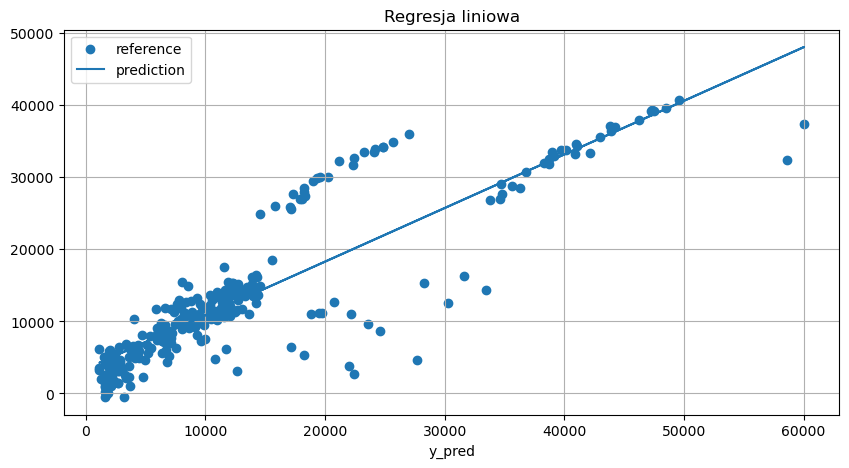

In [4]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja liniowa')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Regresja Polinominalna

In [88]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Polinominal Regression
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state=1)

#Standaryzacja
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Regresja Liniowa
pr_model = LinearRegression()
pr_model.fit(x_train, y_train)
y_train_pred = pr_model.predict(x_train)
y_test_pred = pr_model.predict(x_test)

#Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Obliczenie R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train: {:.3f}\nMSE test: {:.3f}'.format(mse_train, mse_test))
print('R2 train: {:.3f}\nR2 test: {:.3f}'.format(r2_train, r2_test))

MSE train: 23362240.645
MSE test: 21147819.565
R2 train: 0.840
R2 test: 0.858


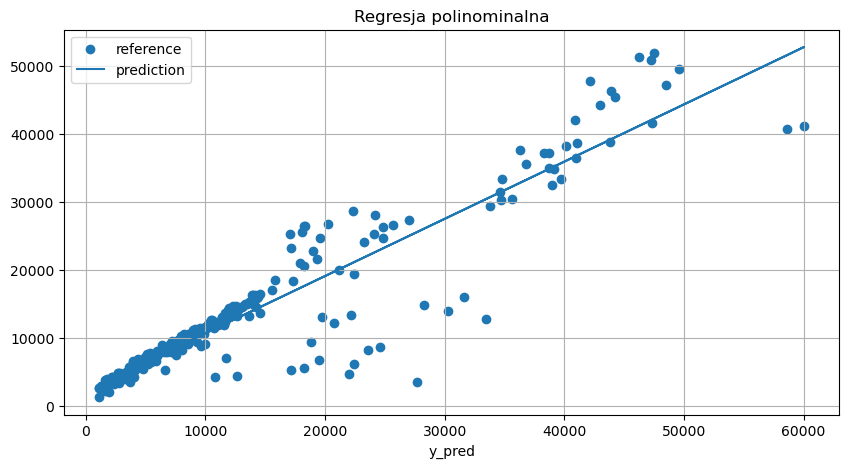

In [6]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja polinominalna')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Regresja Polinominalna + PCA

In [90]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Polinominal Regression
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state=1)

#Standaryzacja
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
    
#PCA
pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("number of principal components = {}".format(pca.n_components_))

#Regresja Liniowa
lr_model = LinearRegression()
lr_model.fit(x_train_pca, y_train)
y_train_pred = lr_model.predict(x_train_pca)
y_test_pred = lr_model.predict(x_test_pca)

#Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Obliczenie R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train: {:.3f}\nMSE test: {:.3f}'.format(mse_train, mse_test))
print('R2 train: {:.3f}\nR2 test: {:.3f}'.format(r2_train, r2_test))

number of principal components = 7
MSE train: 33986792.076
MSE test: 31999034.046
R2 train: 0.767
R2 test: 0.786


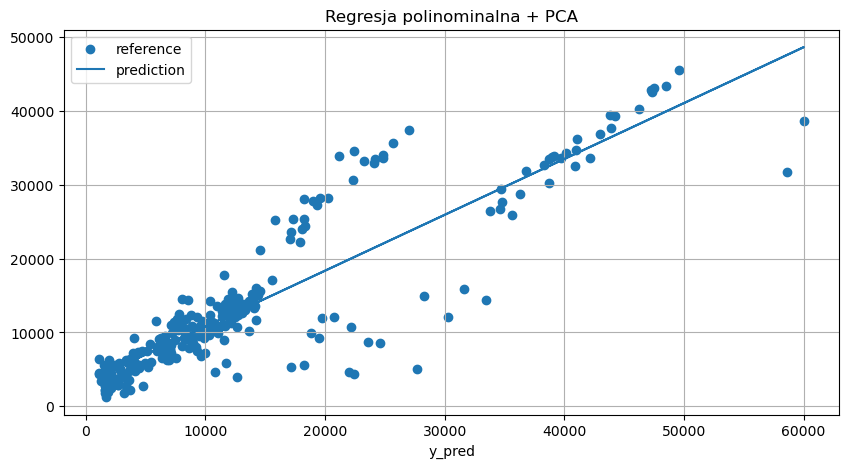

In [8]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja polinominalna + PCA')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Drzewo regresyjne

In [91]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

feature_names = df.columns.drop(['charges', 'region'])

# Drzewo regresyjne
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

#Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Obliczenie R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train: {:.3f}\nMSE test: {:.3f}'.format(mse_train, mse_test))
print('R2 train: {:.3f}\nR2 test: {:.3f}'.format(r2_train, r2_test))

MSE train: 19437342.389
MSE test: 19278240.324
R2 train: 0.867
R2 test: 0.871


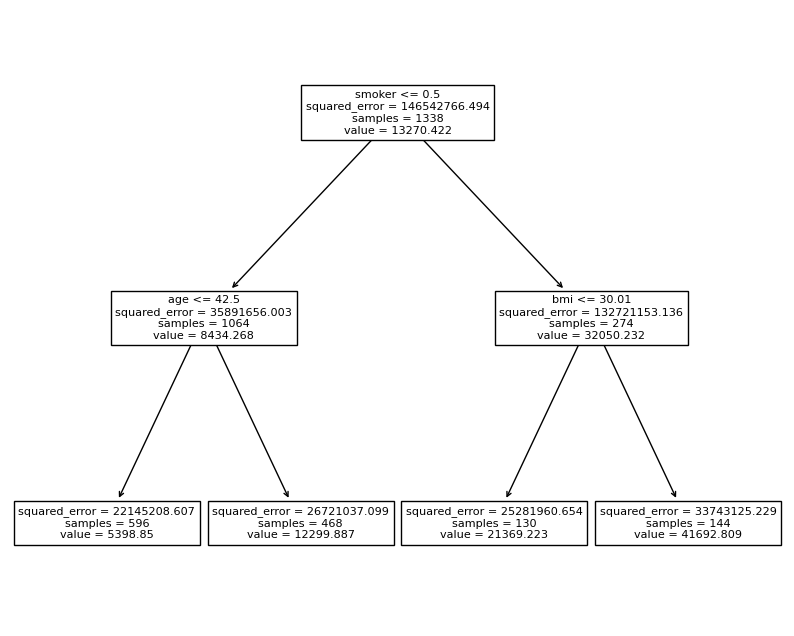

In [92]:
feature_names = list(df.columns.drop(['charges', 'region']))

plt.figure(figsize = (10, 8))
plot_tree(model_reg, feature_names = feature_names);

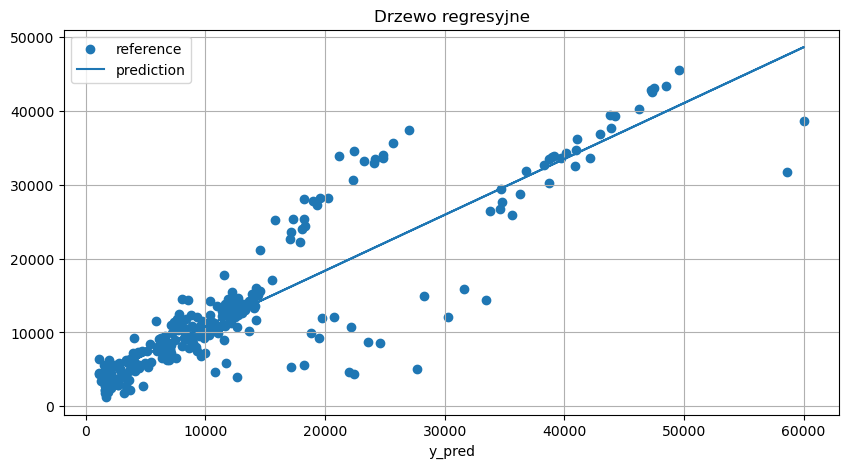

In [93]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Drzewo regresyjne')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Lasy losowe

In [94]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#Lasy losowe
forest = RandomForestRegressor(n_estimators = 100,
                               criterion = 'friedman_mse',
                               max_depth=5,
                               random_state = 1,
                               n_jobs = -1)
forest.fit(x_train,y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

#Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Obliczenie R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE train: {:.3f}\nMSE test: {:.3f}'.format(mse_train, mse_test))
print('R2 train: {:.3f}\nR2 test: {:.3f}'.format(r2_train, r2_test))

MSE train: 16601987.424
MSE test: 19199132.638
R2 train: 0.886
R2 test: 0.871


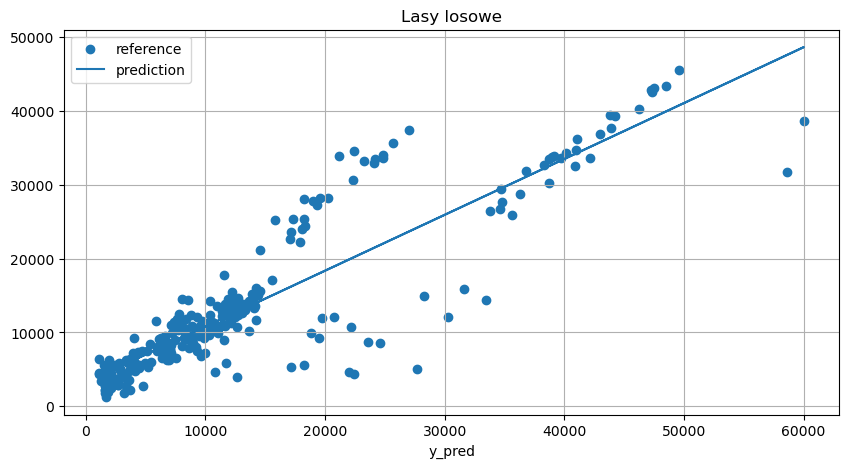

In [95]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Lasy losowe')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()